[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_02/blob/master/F02_S1_HistogramsBinningAndDensity.ipynb)

# Histograms, Binning & Density

https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html

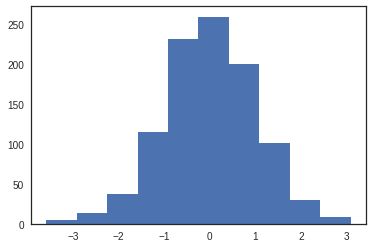

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

plt.hist(data);

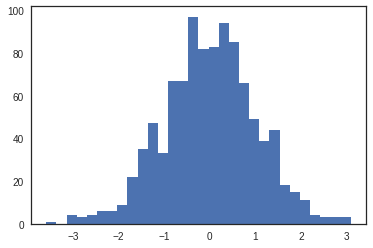

In [2]:
plt.hist(data, bins=30);

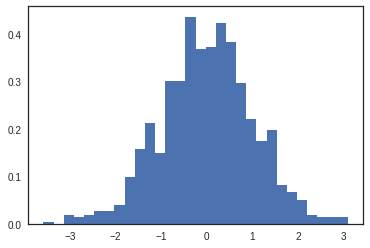

In [3]:
plt.hist(data, bins=30, normed=True); # y is 0-1

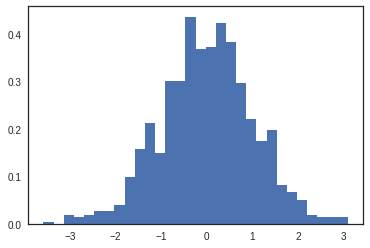

In [4]:
plt.hist(data, bins=30, normed=True, histtype='stepfilled');

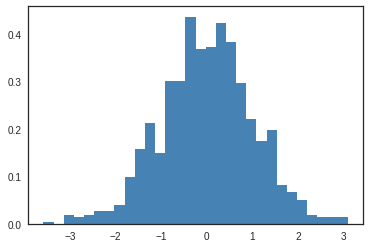

In [5]:
plt.hist(data, bins=30, normed=True, histtype='stepfilled',color='steelblue');

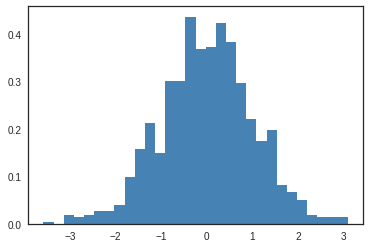

In [6]:
plt.hist(data, bins=30, normed=True, histtype='stepfilled', color='steelblue', edgecolor='none');

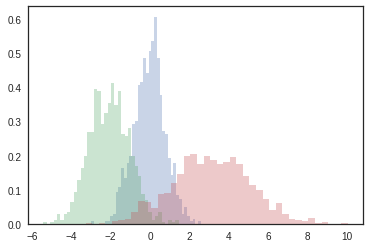

In [7]:
x1 = np.random.normal(0,0.8,1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3,2,1000)

kwargs = dict(histtype='stepfilled', bins=40, normed=True, alpha=0.3)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [8]:
# to just get the numbers without a graph
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 18 152 490 301  39]


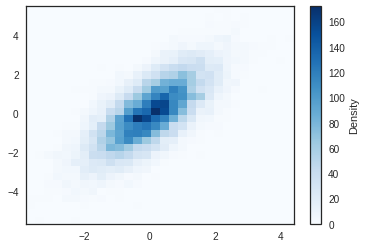

In [11]:
# This makes a 2d plot
mean = [0, 0]
cov =[[1, 1],[1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

plt.hist2d(x, y, bins=30, cmap='Blues');
cb = plt.colorbar()
cb.set_label('Density');

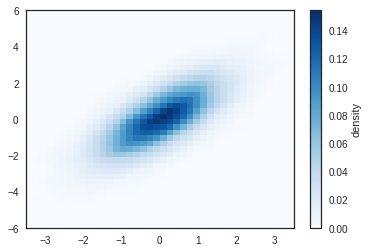

In [17]:
### This make a plot into an image

from scipy.stats import gaussian_kde 
# fit an array of size [nDIM, nSAMPLES]

data = np.vstack([x, y])
kde = gaussian_kde(data)

# evalutate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
          origin='lower', aspect='auto',
          extent=[-3.5, 3.5, -6, 6],
          cmap='Blues'
)
cb = plt.colorbar()
cb.set_label('density')